In [ ]:

!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d youssefaboelwafa/clustering-penguins-species

!unzip clustering-penguins-species.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species
License(s): GNU Lesser General Public License 3.0
  0% 0.00/2.53k [00:00<?, ?B/s]
100% 2.53k/2.53k [00:00<00:00, 3.62MB/s]
Archive:  clustering-penguins-species.zip
  inflating: penguins.csv            


In [ ]:
import pandas as pd
df = pd.read_csv('/content/penguins.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
df = df.drop('sex', axis=1)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [ ]:
# eliminando las filas que no tengan valores numéricos del df

df = df.dropna()


In [ ]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


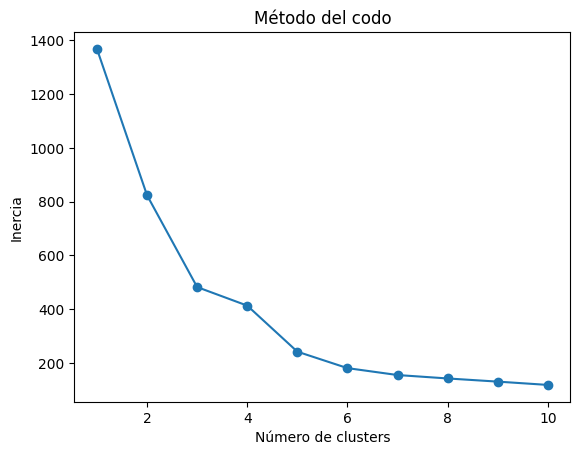

In [ ]:
# número de clusters adecuados, usando el método del codo

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas para el análisis de clustering
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Escalar los datos para que todas las características tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo para encontrar el número óptimo de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)# para ver como varía cada clusters

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


Basado en el gráfico del método del codo, el valor óptimo de k parece ser 3 o 4.

Se puede elegir el valor que mejor se adapte a la interpretación del problema y al análisis de los clusters resultantes

In [ ]:
# Para este caso, por ejemplo, se elige 3 como valor de k:
k = 3
print("El valor de k es:", k)

# Ahora se puede aplicar el algoritmo K-means con el valor de k seleccionado:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_



El valor de k es: 3


<ipython-input-9-3856d2e79fc2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


In [ ]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,1
342,45.2,14.8,212.0,5200.0,1


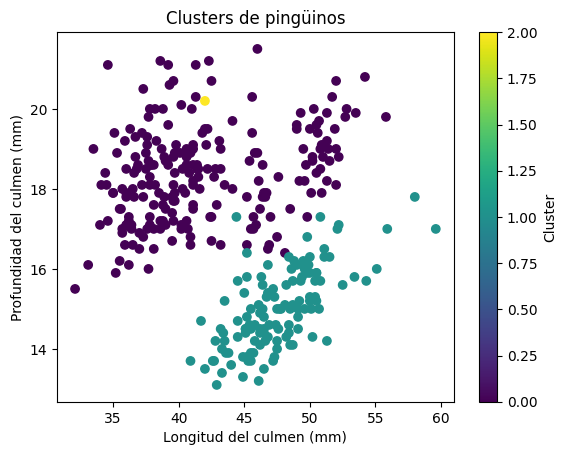

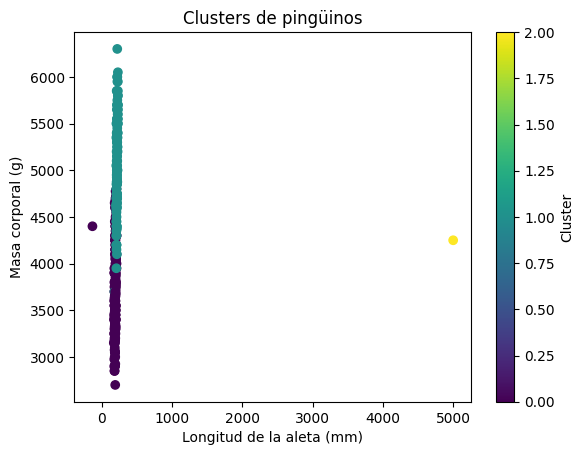

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión con colores por cluster
plt.scatter(df['culmen_length_mm'], df['culmen_depth_mm'], c=df['cluster'], cmap='viridis')
plt.xlabel('Longitud del culmen (mm)')
plt.ylabel('Profundidad del culmen (mm)')
plt.title('Clusters de pingüinos')
plt.colorbar(label='Cluster')
plt.show()

# Puedes crear otros gráficos de dispersión con diferentes combinaciones de variables
# para visualizar los clusters desde otras perspectivas.
# Por ejemplo:
plt.scatter(df['flipper_length_mm'], df['body_mass_g'], c=df['cluster'], cmap='viridis')
plt.xlabel('Longitud de la aleta (mm)')
plt.ylabel('Masa corporal (g)')
plt.title('Clusters de pingüinos')
plt.colorbar(label='Cluster')
plt.show()


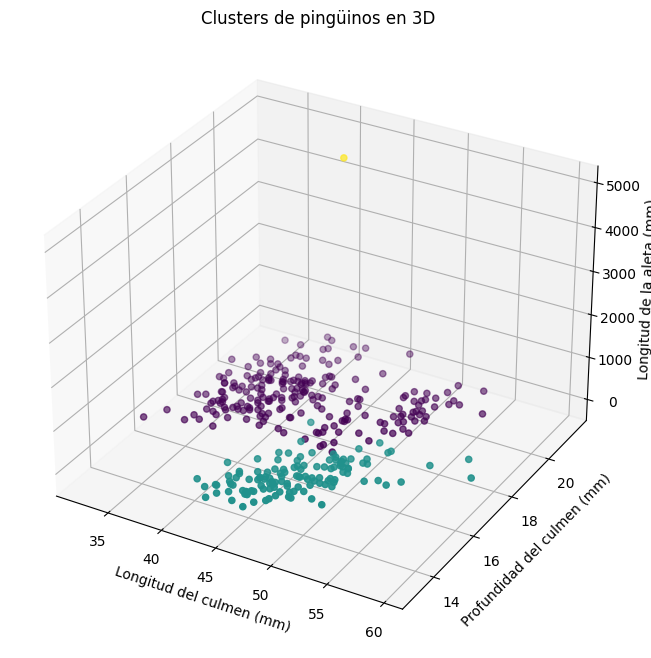

In [ ]:
# grafico en 3d

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['culmen_length_mm'], df['culmen_depth_mm'], df['flipper_length_mm'], c=df['cluster'], cmap='viridis')

ax.set_xlabel('Longitud del culmen (mm)')
ax.set_ylabel('Profundidad del culmen (mm)')
ax.set_zlabel('Longitud de la aleta (mm)')
ax.set_title('Clusters de pingüinos en 3D')

plt.show()


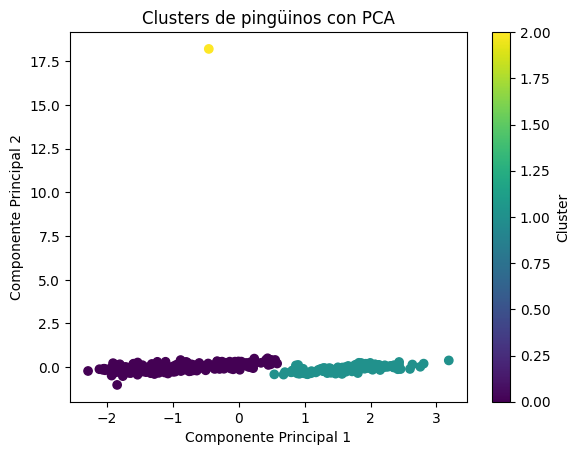

Varianza explicada por cada componente principal: [0.47114808 0.25339237]


In [ ]:
# aplicando el PCA

from sklearn.decomposition import PCA

# Aplicamos PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Visualizamos los datos transformados por PCA
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=df['cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de pingüinos con PCA')
plt.colorbar(label='Cluster')
plt.show()

# Verificamos la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)


Podemos observar si la reducción de dimensiones captura la mayoría de la varianza del conjunto de datos.

Si la varianza explicada es alta, se puede concluir que el PCA es una buena opción para reducir la dimensionalidad en este caso.


Si se obtienen buenos resultados con PCA (es decir, se conserva la mayor parte de la información original), se puede usar para visualizar mejor los clusters y simplificar el análisis.

Si no se obtienen buenos resultados, entonces se puede optar por usar métodos de clustering en el espacio original, sin reducir la dimensionalidad.
